# Example notebook on creating an LRS2 TSL file

- Assumes want to do both LRS2-R and LRS2-B exposures of the same exposure time

Dependencies: 
- astropy
- astroquery
- skyview

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astropy
import sys
%matplotlib inline

sys.path.append("../src/")

import het_helper_functions
import het_obs
import astropy.units as u
from astropy.coordinates import SkyCoord
import getpass

# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try: sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print("Paths already removed")


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


# Read in data
- Main columns are columns that contain the name, RA and DEC

In [2]:
df = pd.read_csv("../data/lrs2/targets/kdwarfs.csv")
df

,name,RAJ2000,DECJ2000,SpT
0,NLTT 3598,16.3740,15.3885,K7.4
1,NLTT 4568,20.6531,12.7524,K7.8
2,NLTT 4599,20.7525,-12.9583,K7.9
3,NLTT 8107,37.2792,22.8671,K5.9
4,NLTT 11125,53.0251,43.6669,K7.3
5,NLTT 11176,53.3085,46.2553,K7.3
6,NLTT 15974,90.8105,19.3595,K5.7
7,Gl 394,157.6055,55.9991,K7.1
8,NLTT 29641,181.7372,5.8026,K5.7
9,NLTT 33176,197.8435,9.6036,K7.5


# Query Simbad
- We are interested in getting the fluxes (V mag), and the proper motions 
- Proper motions are important, as HET requires the RA/DEC coordinates to be given in the current epoch, e.g., 2018.1

In [3]:
dataframes = []
for i, name in enumerate(df.name.values):
    #name = name.split(";")[0]
    print(i,name)
    table = het_helper_functions.get_ra_dec_pmra_pmdec(name).to_pandas()
    dataframes.append(table)
    table["VMAG"] = het_helper_functions.get_simbad_fluxes(name)["FLUX_V"].values[0]
    table["RMAG"] = het_helper_functions.get_simbad_fluxes(name)["FLUX_R"].values[0]
    table["IMAG"] = het_helper_functions.get_simbad_fluxes(name)["FLUX_I"].values[0]
    table["JMAG"] = het_helper_functions.get_simbad_fluxes(name)["FLUX_J"].values[0]
    table["SIMBADNAME"] = name
df_all = pd.concat(dataframes)
df_all = df_all.fillna(0.)
df_all

0 NLTT 3598
1 NLTT 4568
2 NLTT 4599
3 NLTT 8107
4 NLTT 11125
5 NLTT 11176
6 NLTT 15974
7 Gl 394
8 NLTT 29641
9 NLTT 33176
10 NLTT 39942
11 NLTT 42006
12 NLTT 56041
13 NLTT 58659


,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,PMRA,PMDEC,RA_2_A_ICRS_J2018_07_2000,DEC_2_D_ICRS_J2018_07_2000,VMAG,RMAG,IMAG,JMAG,SIMBADNAME
0,HD 6440B,01 05 29.753,+15 23 18.45,7.0,7.0,37.000,37.000,90.0,B,O,2012yCat.1322....0Z,6.400,-196.800,01 05 29.761,+15 23 14.89,9.850,9.100,8.500,7.150,NLTT 3598
0,BD+12 168,01 22 36.6014,+12 45 03.404,9.0,9.0,13.980,9.680,90.0,A,O,2007A&A...474..653V,402.140,7.820,01 22 37.0981,+12 45 03.545,8.770,0.000,0.000,0.000,NLTT 4568
0,HD 8389B,01 23 00.614,-12 57 30.21,7.0,7.0,15.000,14.000,75.0,B,O,2003yCat.1289....0Z,460.500,-33.900,01 23 01.183,-12 57 30.82,10.300,10.089,9.020,7.485,NLTT 4599
0,BD+22 353,02 29 07.3416,+22 52 05.133,9.0,9.0,15.020,15.000,90.0,A,O,2007A&A...474..653V,179.170,-209.470,02 29 07.5758,+22 52 01.348,9.230,8.800,8.300,0.000,NLTT 8107
0,LSPM J0332+4340S,03 32 05.99,+43 40 01.0,6.0,6.0,60.000,60.000,90.0,B,I,2003yCat.2246....0C,299.000,-119.000,03 32 06.49,+43 39 58.8,12.300,12.500,0.000,9.239,NLTT 11125
0,HD 21845B,03 33 14.0460,+46 15 18.990,8.0,8.0,20.000,16.000,90.0,B,O,2012yCat.1322....0Z,64.700,-172.400,03 33 14.1587,+46 15 15.875,11.290,10.500,0.000,8.382,NLTT 11176
0,BD+19 1185B,06 03 14.458,+19 21 34.72,7.0,7.0,60.000,60.000,90.0,B,N,2003yCat.2246....0C,671.000,-620.000,06 03 15.315,+19 21 23.52,13.814,13.206,12.414,10.587,NLTT 15974
0,* 36 UMa B,10 30 25.3093,+55 59 56.850,8.0,8.0,0.328,0.148,0.0,A,O,2016A&A...595A...2G,-182.667,-31.672,10 30 24.9158,+55 59 56.278,8.760,8.749,7.300,6.119,Gl 394
0,HD 105219,12 06 56.5138,+05 48 12.268,9.0,9.0,10.300,5.830,90.0,A,O,2007A&A...474..653V,243.020,-246.800,12 06 56.8081,+05 48 07.809,8.420,8.100,7.800,7.175,NLTT 29641
0,HD 114606B,13 11 22.44,+09 36 13.2,6.0,6.0,150.000,60.000,0.0,B,I,2003yCat.2246....0C,-517.000,269.000,13 11 21.81,+09 36 18.1,12.330,11.300,10.500,9.680,NLTT 33176


In [4]:
df["PMRA"]        = df_all["PMRA"].values
df["PMDEC"]       = df_all["PMDEC"].values
df["RA_SIMBAD"]   = het_helper_functions.raHMS2deg(df_all["RA"].values)
df["DEC_SIMBAD"]  = het_helper_functions.decDeg2deg(df_all["DEC"].values)
df["MAIN_ID"]     = [het_helper_functions.compactString(i) for i in df_all["SIMBADNAME"].values]
df["VMAG"]        = df_all["VMAG"].values
df["RMAG"]        = df_all["RMAG"].values
df["IMAG"]        = df_all["IMAG"].values
df["JMAG"]        = df_all["JMAG"].values

# Remove nans
#df = df.fillna(0) 

# Reject too bright stars
df_cut = df[(df.VMAG>8.) & (df.JMAG >8.)]
df_cut

,name,RAJ2000,DECJ2000,SpT,PMRA,PMDEC,RA_SIMBAD,DEC_SIMBAD,MAIN_ID,VMAG,RMAG,IMAG,JMAG
4,NLTT 11125,53.0251,43.6669,K7.3,299.0,-119.0,53.024958,43.666944,NLTT_11125,12.300,12.500,0.000,9.239
5,NLTT 11176,53.3085,46.2553,K7.3,64.7,-172.4,53.308525,46.255275,NLTT_11176,11.290,10.500,0.000,8.382
6,NLTT 15974,90.8105,19.3595,K5.7,671.0,-620.0,90.810242,19.359644,NLTT_15974,13.814,13.206,12.414,10.587
9,NLTT 33176,197.8435,9.6036,K7.5,-517.0,269.0,197.843500,9.603667,NLTT_33176,12.330,11.300,10.500,9.680
10,NLTT 39942,230.1179,0.1908,K7.5,142.0,-246.0,230.117917,0.190806,NLTT_39942,12.121,11.625,10.300,9.426
11,NLTT 42006,241.8236,-14.3797,K7.9,-63.4,-128.3,241.823583,-14.379719,NLTT_42006,12.540,12.090,10.770,9.758


# Check magnitudes

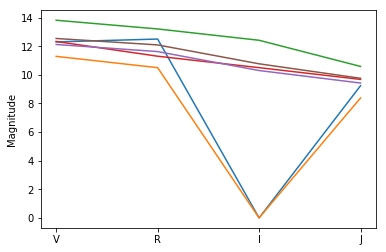

In [5]:
fig, ax = plt.subplots()
for i in range(len(df_cut)):
    d = [df_cut.VMAG.values[i],
         df_cut.RMAG.values[i],
         df_cut.IMAG.values[i],
         df_cut.JMAG.values[i]]
    ax.plot(d)
ax.set_ylabel("Magnitude")
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["V","R","I","J"])

#### Checking that the arrays are the same

In [6]:
print(np.allclose(df_cut["RAJ2000"],df_cut["RA_SIMBAD"],0.001))
print(np.allclose(df_cut["DECJ2000"],df_cut["DEC_SIMBAD"],0.001))

True
True


# Checking what targets are observable

In [7]:
# Takes awhile to set this class up
HTO = het_obs.HETObservability('2018-02-25 05:00:00','2018-03-05 05:00:00')

  0%|          | 0/8 [00:00<?, ?it/s]

Using Twilight = -18.0
Creating array of 8 nights to check observability
Calculating Sunrise/Sunset Times


  0%|          | 0/8 [00:00<?, ?it/s]

Calculating Local Sidereal Times


100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

Finished loading observability limits for all nights



../src/het_obs.py:89: RuntimeWarning: invalid value encountered in arccos
  h1 = degrees(arccos( (sin(alt1) - sin(decs_rad)*sin(phi)) / (cos(decs_rad)*cos(phi)) ))
../src/het_obs.py:90: RuntimeWarning: invalid value encountered in arccos
  h2 = degrees(arccos( (sin(alt2) - sin(decs_rad)*sin(phi)) / (cos(decs_rad)*cos(phi)) ))


In [8]:
# Epoch for March 18th, 2018
EPOCH   = 2018. + (31. + 28. + 18.)/365.245
A = het_helper_functions.AngleWithProperMotion(epoch=EPOCH)
cc_new = [A.radec_with_proper_motion(df_cut["RA_SIMBAD"].values[i],
                                     df_cut["DEC_SIMBAD"].values[i],
                                     df_cut["PMRA"].values[i],
                                     df_cut["PMDEC"].values[i],verbose=True) for i in range(len(df_cut))]
# We want the number of observable days
observable_days = [len(HTO.get_observable_days(c,verbose=True)) for c in cc_new] 
df_obs = df_cut[np.array(observable_days)>0]

Loaded de421.bsp
Coordinates at 2000.000000: RA=3:32:05.99 DEC=43:40:01.0002
with  PMRA=299.0 PMDEC=-119.0
Coordinates at 2018.210817: RA=3:32:06.4918 DEC=43:39:58.8328

Coordinates at 2000.000000: RA=3:33:14.046 DEC=46:15:18.9902
with  PMRA=64.7 PMDEC=-172.4
Coordinates at 2018.210817: RA=3:33:14.1596 DEC=46:15:15.8505

Coordinates at 2000.000000: RA=6:03:14.4579 DEC=19:21:34.7208
with  PMRA=671.0 PMDEC=-620.0
Coordinates at 2018.210817: RA=6:03:15.3214 DEC=19:21:23.4292

Coordinates at 2000.000000: RA=13:11:22.44 DEC=9:36:13.1996
with  PMRA=-517.0 PMDEC=269.0
Coordinates at 2018.210817: RA=13:11:21.8034 DEC=9:36:18.0987

Coordinates at 2000.000000: RA=15:20:28.3 DEC=0:11:26.9003
with  PMRA=142.0 PMDEC=-246.0
Coordinates at 2018.210817: RA=15:20:28.4724 DEC=0:11:22.4201

Coordinates at 2000.000000: RA=16:07:17.66 DEC=-14:22:46.9898
with  PMRA=-63.4 PMDEC=-128.3
Coordinates at 2018.210817: RA=16:07:17.5805 DEC=-14:22:49.3264

Target is observable on 8 days out of 8
Target is observable

../src/het_obs.py:139: RuntimeWarning: invalid value encountered in less
  tt_1 = abs(has) < ha_lim_2


In [9]:
# check which targets are not observable
zip(df_cut.name.values,observable_days)

[('NLTT 11125', 8),
 ('NLTT 11176', 8),
 ('NLTT 15974', 8),
 ('NLTT 33176', 8),
 ('NLTT 39942', 8),
 ('NLTT 42006', 0)]

# Create Finder Charts


In [10]:
# Start finderchart maker
FM = het_obs.FinderChartMaker()

In [11]:
# Make finder charts
for i in range(len(df_obs)):
    print(i,
          df_obs.MAIN_ID.values[i],
          df_obs.RA_SIMBAD.values[i],
          df_obs.DEC_SIMBAD.values[i])
    FM.make_chart_shift(ra=df_obs["RA_SIMBAD"].values[i],
                        de=df_obs["DEC_SIMBAD"].values[i],
                        pmra=df_obs["PMRA"].values[i],
                        pmde=df_obs["PMDEC"].values[i],
                        name=df_obs["MAIN_ID"].values[i],
                        outdir="../data/lrs2/findercharts/")

0 NLTT_11125 53.02495833333332 43.66694444444444
1 NLTT_11176 53.30852499999999 46.255275
2 NLTT_15974 90.81024166666666 19.359644444444445
3 NLTT_33176 197.8435 9.603666666666665
4 NLTT_39942 230.11791666666664 0.19080555555555553


# Create TSL file


In [12]:
vmag = df_obs["VMAG"].values
exptime = [het_helper_functions.lrs2_scale_exptime_from_mags(mag,MINLIM=10.) for mag in vmag]
repeat_exp = 2.*np.ones(len(df_obs))

In [13]:
het_helper_functions.print_TSL(names=df_obs["MAIN_ID"].values,
                               vmag=vmag,
                               priority=4*np.ones(len(df_obs)),
                               ra=df_obs["RA_SIMBAD"].values,
                               dec=df_obs["DEC_SIMBAD"].values,
                               pmra=df_obs["PMRA"].values,
                               pmdec=df_obs["PMDEC"].values,
                               exptime=exptime,
                               outputname="../data/lrs2/tsl/lrs2_submission_kdwarfs.tsl",
                               epoch=EPOCH,
                               repeat_exposures=repeat_exp,
                               program="PSU18-1-XXX",
                               instrument="LRS2",
                               visits=1)

Number of visits = 1
Instrument = LRS2
Program = PSU18-1-XXX
Loaded de421.bsp
Printed TSL file to ../data/lrs2/tsl/lrs2_submission_kdwarfs.tsl


In [14]:
cat "../data/lrs2/tsl/lrs2_submission_kdwarfs.tsl"

COMMON
   PROGRAM PSU18-1-XXX
   SEEING 3.0
   SKYTRANS S
   NUMEXP 1
   VISITS 1
   STDCALS Y
   SNWAVE 6000
   SNGOAL 200
   SKYBRIGHT 18
   SKYCALS Y
   TELL Y
GROUP
   GNAME NLTT_11125
   GTYPE SEQ
TRACK
   OBJECT NLTT_11125
   MAG 12
   PRI 4
   RA 3:32:06.49
   DEC 43:39:58.83
ACTION_LIST
   INSTRUMENT      EXP
      LRS2-R 42
      LRS2-R 42
      LRS2-B 42
      LRS2-B 42
GROUP
   GNAME NLTT_11176
   GTYPE SEQ
TRACK
   OBJECT NLTT_11176
   MAG 11
   PRI 4
   RA 3:33:14.16
   DEC 46:15:15.85
ACTION_LIST
   INSTRUMENT      EXP
      LRS2-R 17
      LRS2-R 17
      LRS2-B 17
      LRS2-B 17
GROUP
   GNAME NLTT_15974
   GTYPE SEQ
TRACK
   OBJECT NLTT_15974
   MAG 14
   PRI 4
   RA 6:03:15.32
   DEC 19:21:23.43
ACTION_LIST
   INSTRUMENT      EXP
      LRS2-R 169
      LRS2-R 169
      LRS2-B 169
      LRS2-B 169
GROUP
   GNAME NLTT_33176
   GTYPE SEQ
TRACK
   OBJECT NLTT_33176
   MAG 12
   PRI 4
   RA 13:11:21.80
   DEC 9:36:18.10
ACTION_LIST
   INSTRUMENT      EXP
      LRS2-R 43
 